In [1]:
%matplotlib inline
import os
import subprocess
from scipy.stats.mstats import gmean
from __future__ import division

In [7]:
# Test the agent against all the different maps in 'map'.
def testmaps():
    test = []

    for filename in os.listdir('map'):
        result = subprocess.check_output('./agent '+ './map/' + filename, shell=True)
        test.append(float(result))

    return test

In [8]:
# Builds the executable
def make(strategy):
    return subprocess.check_output(
     "g++ main.cpp environment.cpp agent.cpp evaluator.cpp random_num_gen.cpp -o agent -fpermissive " + strategy,
     shell=True
    )

In [12]:
# Measures the goodness of a solution
standard_results = [349.2, 634.5, 408.3, 530.6, 660.1, 389.7, 477.7, 498.2]

def goodness(results):
    proportions = [a/b for a,b in zip(results,standard_results)]
    return gmean(proportions)

## Estrategia: Random

Escoje aleatoriamente una acción entre las cuatro.

In [13]:
make("")

''

In [14]:
print testmaps()
print goodness(testmaps())

[349.2, 634.5, 408.3, 530.6, 660.1, 389.7, 477.7, 498.2]
1.0


## Estrategia: Casi aleatoriamente

Aleatoriamente, pero omitiendo la acción de observar.

In [15]:
make("-DRANDOMLY")
print testmaps()
print goodness(testmaps())

[499.5, 726.5, 451.9, 634.4, 807.7, 539.8, 552.8, 689.9]
1.24805226388


## Estrategia: Paredes

Evita caminar contra una pared y evita en lo posible girar hacia donde luego encontrará una pared.

In [40]:
make("-DWALLS")
print testmaps()
print goodness(testmaps())

[895.3, 890.1, 628.3, 846.1, 877.6, 893.7, 641.6, 833.4]
1.66986494108


## Estrategia: Mapa

Primera estrategia determinista. Consulta la memoria para extraer de los sitios donde lleva tiempo sin hacerlo, para evitar chocar contra paredes y para girar. Primer caso determinista.

In [48]:
make("-DMAP")
print testmaps()
print goodness(testmaps())

[2612.0, 1325.6, 2785.4, 1450.9, 1360.9, 2974.9, 1215.4, 3027.5]
4.03977928069


### Estudio del factor `SUFICIENTE_TRUFA`

La constante `SUFICIENTE_TRUFA` determina cuándo el agente cree que ha crecido suficiente trufa para ser recolectada. Lo que hará será empezar a recolectar una vez haya suficiente. La variación de esta constante variará la frecuencia con la 
que se recolecta.

Un factor razonable es `10.000`, porque se llega a él en el tiempo esperado de crecimiento de una trufa con crecimiento del `p = 1.5`. Pero probar valores por encima y por debajo puede ser interesante. Se presenta una gráfica con la variación de la bondad según la variación de esta constante.

In [42]:
make("-DMAP -DSUFICIENTE_TRUFA=" + str(4500))
print goodness(testmaps())

4.04984999091


In [18]:
from pylab import *
x = linspace(0,20000,41)
y = []
for xi in x:
    make("-DMAP -DSUFICIENTE_TRUFA=" + str(xi))
    y.append(goodness(testmaps())) 

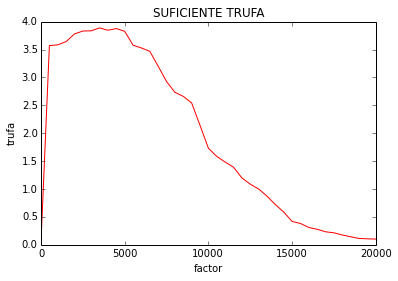

In [19]:
figure()
plot(x, y, 'r')
xlabel('factor')
ylabel('trufa')
title('SUFICIENTE TRUFA')
show()

Obtenemos que el valor general más razonable para `SUFICIENTE_TRUFA` está alrededor de los `4500`.

In [20]:
x = linspace(2000,6000,11)
y = []
for xi in x:
    make("-DMAP -DSUFICIENTE_TRUFA=" + str(xi))
    y.append(goodness(testmaps())) 

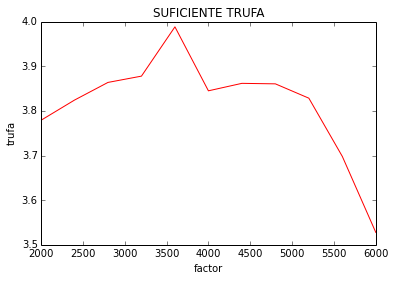

In [21]:
figure()
plot(x, y, 'r')
xlabel('factor')
ylabel('trufa')
title('SUFICIENTE TRUFA')
show()

### Estudio del factor de giro

El factor de giro mide la relación entre la bondad de una casilla y el coste en tiempo de girar para alcanzarla. Cuanto mayor sea, menos valor se le otorga a las casillas a las que se deba girar para alcanzarlas. El factor original era de `1.5`. Probaremos valores razonables entre `1` y `2`.

Encontramos que no podemos establecer ninguna correlación razonable. Tomaremos un factor de giro de `1.1`.

In [29]:
from pylab import *
x = linspace(1,1.5,11)
y = []
for xi in x:
    make("-DMAP -DFACTOR_GIRO=" + str(xi))
    y.append(goodness(testmaps())) 

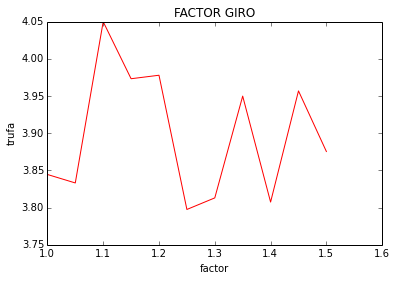

In [30]:
figure()
plot(x, y, 'r')
xlabel('factor')
ylabel('trufa')
title('FACTOR GIRO')
show()